In [1]:
import numpy as np
import pandas as pd
import sklearn

In [86]:
!unzip archive.zip

Archive:  archive.zip
  inflating: emails.csv              


In [87]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [111]:
y = df['spam']

In [110]:
df.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [112]:
y.head(3)

0    1
1    1
2    1
Name: spam, dtype: int64

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

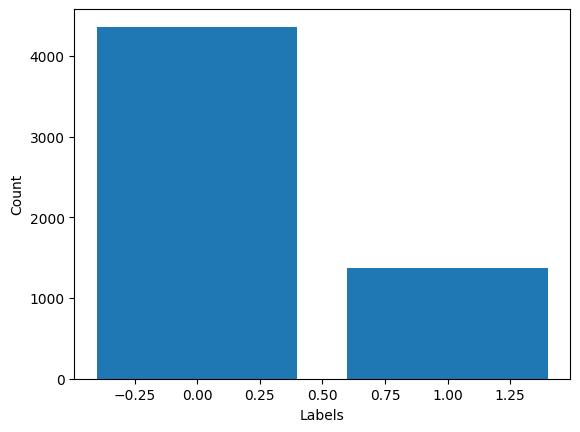

In [113]:
zeros, ones = y[y==0].count(), y[y==1].count()
plt.bar([0, 1], [zeros, ones])
plt.xlabel('Labels')
plt.ylabel('Count')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spam,5728.0,0.238827,0.426404,0.0,0.0,0.0,0.0,1.0


In [116]:
len(df['text'].unique())

5695

In [117]:
print(df['text'].isna().any())
print(y.isna().any())

False
False


In [121]:
df.duplicated().sum()

33

In [122]:
df.drop_duplicates(inplace=True)
y = df['spam']

In [124]:
df['length'] = df['text'].apply(len)
df = df.sort_values(by='length', ascending=False)
df.head(4)

,text,spam,length
2650,Subject: from the enron india newsdesk - april...,0,43952
1380,Subject: from the enron india newsdesk - april...,0,43937
2338,Subject: from the enron india newsdesk - april...,0,31055
536,Subject: make thousands just sending emails . ...,1,28432


In [125]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [132]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [146]:
def preprocess1(email):
  text = " ".join([word.lower() for word in email.split() if (word not in stopwords.words('english')) and (word not in string.punctuation)])
  return text

def preprocess2(email):
  text = " ".join([WordNetLemmatizer().lemmatize(word) for word in email.split()])
  return text

In [147]:
df['clean_email1'] = df['text'].apply(preprocess1)
df.head(3)

,text,spam,length,clean_email1,clean_email2
2650,Subject: from the enron india newsdesk - april...,0,43952,subject: enron india newsdesk april 27 th news...,subject: enron india newsdesk - april 27 th ne...
1380,Subject: from the enron india newsdesk - april...,0,43937,subject: enron india newsdesk april 27 th news...,subject: enron india newsdesk - april 27 th ne...
2338,Subject: from the enron india newsdesk - april...,0,31055,subject: enron india newsdesk april 23 rd news...,subject: enron india newsdesk - april 23 rd ne...


In [148]:
df['clean_email2'] = df['clean_email1'].apply(preprocess2)
df.head(3)

,text,spam,length,clean_email1,clean_email2
2650,Subject: from the enron india newsdesk - april...,0,43952,subject: enron india newsdesk april 27 th news...,subject: enron india newsdesk april 27 th news...
1380,Subject: from the enron india newsdesk - april...,0,43937,subject: enron india newsdesk april 27 th news...,subject: enron india newsdesk april 27 th news...
2338,Subject: from the enron india newsdesk - april...,0,31055,subject: enron india newsdesk april 23 rd news...,subject: enron india newsdesk april 23 rd news...


In [149]:
df['clean_email2'][0]

'subject: naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good product effective business organization practicable aim hotat nowadays market promise marketing effort become much effective list clear benefit creativeness hand made original logo specially done reflect distinctive company image convenience logo stationery provided format easy use content management system letsyou change website content even structure promptness see logo draft within three business day affordability marketing break make gap budget 100 satisfaction guaranteed provide unlimited amount change extra fee surethat love result collaboration look portfolio interested'

In [152]:
df['clean_email'] = df['clean_email2']
df.drop(columns=['clean_email1', 'clean_email2'], inplace=True)
df.head(3)

,text,spam,length,clean_email
2650,Subject: from the enron india newsdesk - april...,0,43952,subject: enron india newsdesk april 27 th news...
1380,Subject: from the enron india newsdesk - april...,0,43937,subject: enron india newsdesk april 27 th news...
2338,Subject: from the enron india newsdesk - april...,0,31055,subject: enron india newsdesk april 23 rd news...


In [150]:
def plot_ngrams(ax, texts, ngram_range=(2, 2), num_top_ngrams=25, title=''):
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    X = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()

    ngram_counts = X.sum(axis=0).A1
    ngram_dict = dict(zip(feature_names, ngram_counts))
    sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)

    top_ngrams = sorted_ngrams[:num_top_ngrams]

    sns.barplot(ax=ax, x=[ngram[1] for ngram in top_ngrams],
                y=[ngram[0] for ngram in top_ngrams],
                orient="h",
                width=0.5,
                palette='Spectral')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('N-gram')
    ax.set_title(title)

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

<ipython-input-150-23fd422eb685>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=[ngram[1] for ngram in top_ngrams],
<ipython-input-150-23fd422eb685>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=[ngram[1] for ngram in top_ngrams],


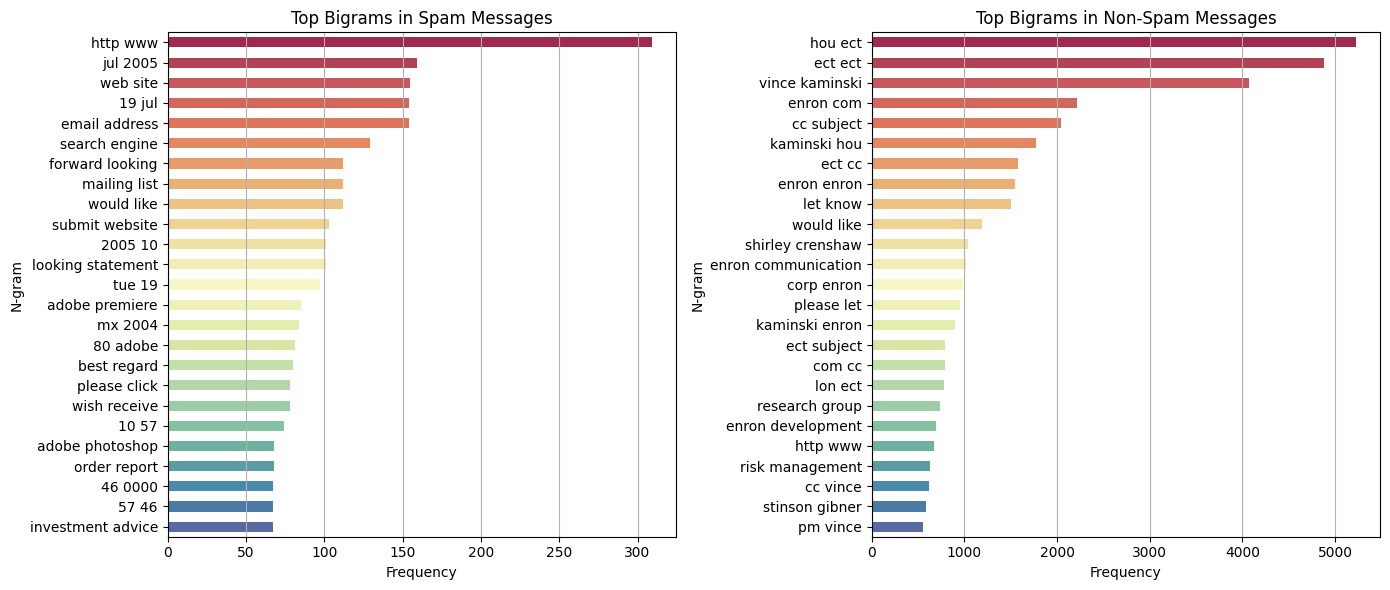

In [155]:
spam_texts = df[df['spam'] == 1]['clean_email']
non_spam_texts = df[df['spam'] == 0]['clean_email']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_ngrams(axes[0], spam_texts, title='Top Bigrams in Spam Messages')
plot_ngrams(axes[1], non_spam_texts, title='Top Bigrams in Non-Spam Messages')
axes[0].grid(axis='x')
axes[1].grid(axis='x')
plt.tight_layout()
plt.show()

In [158]:
vectorizer = CountVectorizer()
bow_text = vectorizer.fit_transform(df["clean_email"])

print(f"10 Bag Of Words Features: {vectorizer.get_feature_names_out()[500:510]}")
print(f"Total number of vocab words: {len(vectorizer.vocabulary_)}")

10 Bag Of Words Features: ['1239' '12390' '124' '1243' '1244' '125' '12500' '1251' '1252' '125217']
Total number of vocab words: 34560


In [160]:
transformed_bow = vectorizer.transform(df["clean_email"])

print(f"Shape of sparse matrix: {transformed_bow.shape}")
print(f"Amount of non-zero occurrences: {transformed_bow.nnz}")

Shape of sparse matrix: (5695, 34560)
Amount of non-zero occurrences: 532048


In [164]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [162]:
tfidf_transformer = TfidfTransformer().fit(transformed_bow)

text_tfidf = tfidf_transformer.transform(transformed_bow)
print(text_tfidf.shape)

(5695, 34560)


In [165]:
x_train, x_test, y_train, y_test = train_test_split(
    text_tfidf, df["spam"], test_size=0.2
)

print(f"train dataset features size: {x_train.shape}")
print(f"train dataset label size: {y_train.shape}")

print(f"test dataset features size: {x_test.shape}")
print(f"test dataset label size: {y_test.shape}")

train dataset features size: (4556, 34560)
train dataset label size: (4556,)
test dataset features size: (1139, 34560)
test dataset label size: (1139,)


In [169]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_predict

In [175]:
def evaluate_model(model, x_test, y_test, model_name="Model"):
    y_pred = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = TN / (TN + FP)
    miss_rate = FN / (FN + TP)

    mean_accuracy = cross_val_predict(model, x_train.toarray(), y_train, cv=10).mean()

    mse = mean_squared_error(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    metrics = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1-score": f1,
        "Specificity": specificity,
        "Miss Rate": miss_rate,
        "Mean Accuracy": mean_accuracy,
        "Mean Square Error": mse,
        "Classification Report": classification_rep
    }
    print(f"\033[1m EVALUATION METRICS ({model_name}) \033[0m")
    print(f"\n \033 ---------------------------------------------------------------- \033[0m")
    print("\nTrue Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("\nAccuracy   : ", accuracy)
    print("Recall       : ", recall)
    print("Precision    : ", precision)
    print("F1-score     : ", f1)
    print("Specificity  : ", specificity)
    print("Miss Rate    : ", miss_rate)
    print("Mean Accuracy: ", mean_accuracy)
    print("Mean Square Error:", mse)
    print(f" \033 ---------------------------------------------------------------- \033[0m")

    print("\033[1m Classification Report: \033[0m")
    print(classification_report(y_test, y_pred))
    print(f"\n \033 ---------------------------------------------------------------- \033[0m")
    print("\033[1m Confusion Matrix \033[0m")
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='bone_r')
    plt.show()
    return metrics,y_pred

# **SVM**

 EVALUATION METRICS (SVM) 

  ---------------------------------------------------------------- 

True Positives (TP): 284
True Negatives (TN): 843
False Positives (FP): 3
False Negatives (FN): 9

Accuracy   :  0.9894644424934153
Recall       :  0.9692832764505119
Precision    :  0.9895470383275261
F1-score     :  0.979310344827586
Specificity  :  0.9964539007092199
Miss Rate    :  0.030716723549488054
Mean Accuracy:  0.22695346795434593
Mean Square Error: 0.010535557506584723
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       846
           1       0.99      0.97      0.98       293

    accuracy                           0.99      1139
   macro avg       0.99      0.98      0.99      1139
weighted avg       0.99      0.99      0.99      1139


  ---------------------------------------------------------------- 
 Confusion Matrix 


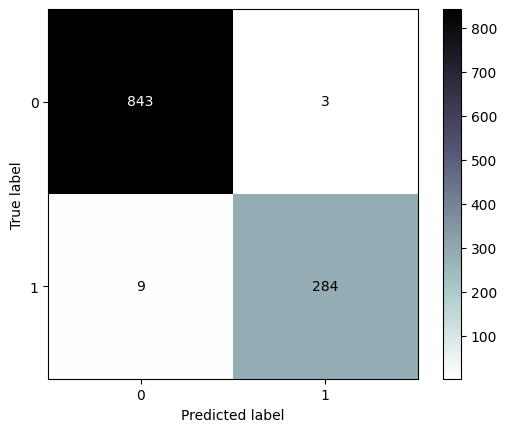

In [170]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Evaluate SVM model
svm_metrics,y_pred_svm = evaluate_model(svm_model, x_test, y_test, model_name="SVM")

# **Random Forest**

 EVALUATION METRICS (Random Forest) 

  ---------------------------------------------------------------- 

True Positives (TP): 274
True Negatives (TN): 846
False Positives (FP): 0
False Negatives (FN): 19

Accuracy   :  0.9833187006145742
Recall       :  0.9351535836177475
Precision    :  1.0
F1-score     :  0.9664902998236331
Specificity  :  1.0
Miss Rate    :  0.06484641638225255
Mean Accuracy:  0.21444249341527655
Mean Square Error: 0.016681299385425813
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       846
           1       1.00      0.94      0.97       293

    accuracy                           0.98      1139
   macro avg       0.99      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139


  ---------------------------------------------------------------- 
 Confusion Matrix 


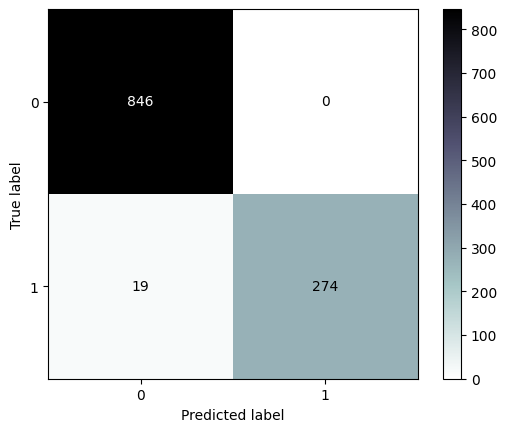

In [171]:
randomForest_model = RandomForestClassifier()
randomForest_model.fit(x_train, y_train)

# Evaluate Random Forest model
rf_metrics,y_pred_rf = evaluate_model(randomForest_model, x_test, y_test, model_name="Random Forest")

# **Naive-Bayes**

 EVALUATION METRICS (Naive Bayes) 

  ---------------------------------------------------------------- 

True Positives (TP): 250
True Negatives (TN): 830
False Positives (FP): 16
False Negatives (FN): 43

Accuracy   :  0.9482001755926251
Recall       :  0.8532423208191127
Precision    :  0.9398496240601504
F1-score     :  0.8944543828264758
Specificity  :  0.9810874704491725
Miss Rate    :  0.14675767918088736
Mean Accuracy:  0.20588235294117646
Mean Square Error: 0.05179982440737489
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       846
           1       0.94      0.85      0.89       293

    accuracy                           0.95      1139
   macro avg       0.95      0.92      0.93      1139
weighted avg       0.95      0.95      0.95      1139


  ---------------------------------------------------------------- 
 Confusion Matrix 

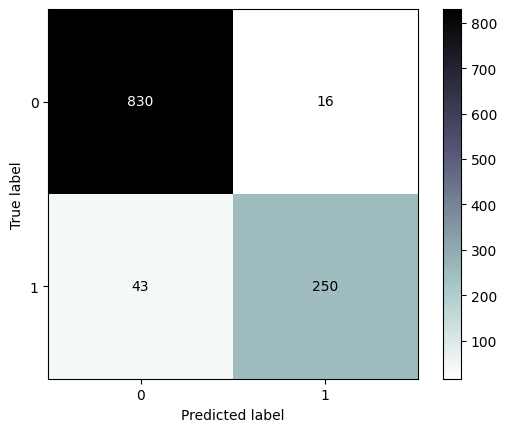

In [176]:
NaiveBayes_model = GaussianNB()
NaiveBayes_model.fit(x_train.toarray(), y_train)

# Evaluate
nb_metrics,y_pred_nb = evaluate_model(NaiveBayes_model, x_test.toarray(), y_test, model_name="Naive Bayes")

# **XGBoost Classifier**

 EVALUATION METRICS (XGBoost) 

  ---------------------------------------------------------------- 

True Positives (TP): 278
True Negatives (TN): 821
False Positives (FP): 25
False Negatives (FN): 15

Accuracy   :  0.9648814749780509
Recall       :  0.9488054607508533
Precision    :  0.9174917491749175
F1-score     :  0.9328859060402684
Specificity  :  0.9704491725768322
Miss Rate    :  0.051194539249146756
Mean Accuracy:  0.2557067603160667
Mean Square Error: 0.03511852502194908
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       846
           1       0.92      0.95      0.93       293

    accuracy                           0.96      1139
   macro avg       0.95      0.96      0.95      1139
weighted avg       0.97      0.96      0.97      1139


  ---------------------------------------------------------------- 
 Confusion Matrix 


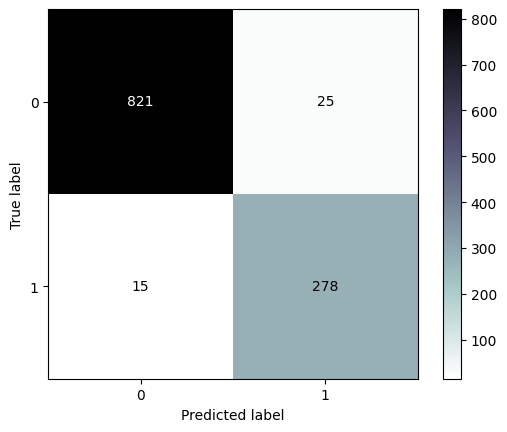

In [174]:
xgboost_model = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    eval_metric='logloss'
)

# Fit the model to the training data
xgboost_model.fit(x_train, y_train)
xgb_metrics, y_pred_xgb = evaluate_model(xgboost_model, x_test, y_test, model_name="XGBoost")

# **Model Comparisons**

In [178]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [181]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rfc = auc(rf_fpr, rf_tpr)
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_rfc = auc(nb_fpr, nb_tpr)
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

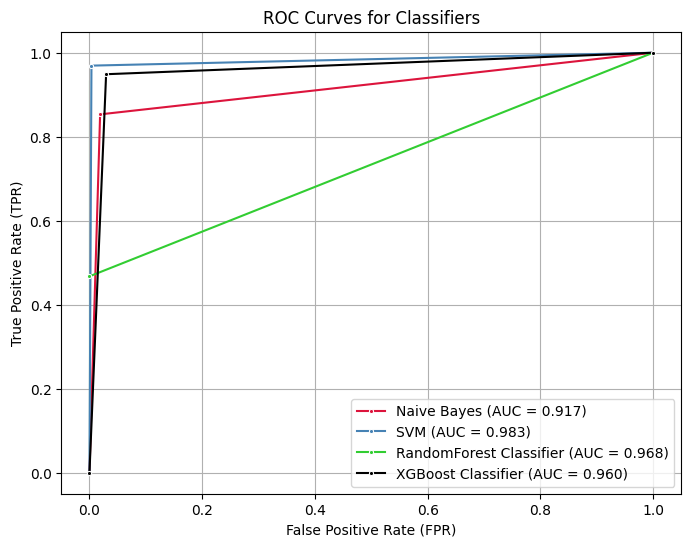

In [185]:
classifiers = {
    'Naive Bayes': (y_pred_nb, nb_fpr, nb_tpr),
    'SVM': (y_pred_svm, svm_fpr, svm_tpr),
    'RandomForest Classifier': (y_pred_rf, rf_fpr, rf_tpr),
    'XGBoost Classifier': (y_pred_xgb, xgb_fpr, xgb_tpr)
}

plt.figure(figsize=(8, 6), dpi=100)
colors=['crimson','steelblue', 'limegreen', 'black']


for i, (clf_name, (y_pred, fpr, tpr)) in enumerate(classifiers.items()):
    auc_score = roc_auc_score(y_test, y_pred)  # Calculate AUC score using roc_auc_score
    sns.lineplot(x=fpr, y=tpr, marker='.', label=f'{clf_name} (AUC = {auc_score:.3f})', color=colors[i])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Classifiers')
plt.grid(True)
plt.legend()
plt.show()

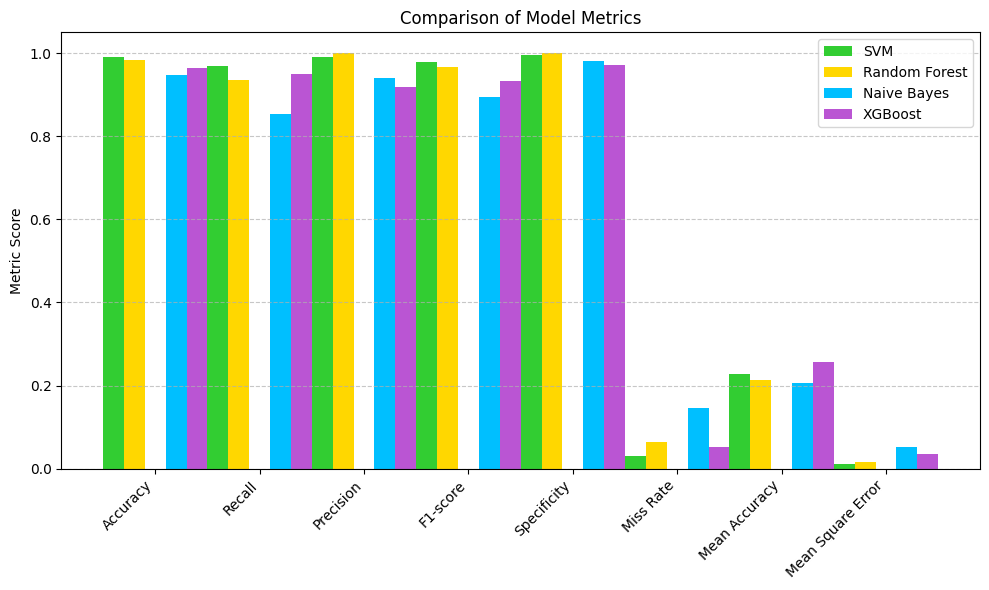

In [188]:
metric_names = list(svm_metrics.keys())

svm_values = [svm_metrics[key] for key in metric_names if key != 'Classification Report']
rf_values = [rf_metrics[key] for key in metric_names if key != 'Classification Report']
nb_values = [nb_metrics[key] for key in metric_names if key != 'Classification Report']
xgb_values = [xgb_metrics[key] for key in metric_names if key != 'Classification Report']

plt.figure(figsize=(10, 6))
x = np.arange(len(metric_names) - 1)
width = 0.2

plt.bar(x - 2*width, svm_values, width, label='SVM', color='limegreen')
plt.bar(x - width, rf_values, width, label='Random Forest', color='gold')
plt.bar(x + width, nb_values, width, label='Naive Bayes', color='deepskyblue')
plt.bar(x + 2*width, xgb_values, width, label='XGBoost', color='mediumorchid')

plt.xticks(x, [name for name in metric_names if name != 'Classification Report'], rotation=45, ha='right')
plt.ylabel('Metric Score')
plt.title('Comparison of Model Metrics')
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()